# Gibbs Sampling for HMM

## (a)

\begin{align}
P(Y_t = y | Y_{-t} = y_{-t}, X = x) & = \frac{P(Y_t = y, Y_{-t} = y_{-t}, X = x)}{P(Y_{-t} = y_{-t}, X = x)}\\
& = \frac{P(Y_1 = y_1) \Pi_{i = 2}^T P(Y_i = y_i | Y_{i-1} = y_{i-1}) \Pi_{i = 1}^T P(X_i = x_i | Y_i = y_i)}
{\int P(Y_{-t} = y_{-t}, X = x, Y_t = y) dy}\\
& = \frac{const \times P(Y_t = y | Y_{t-1} = y_{t-1}) P(Y_{t+1} = y_{t+1} | Y_{t} = y) P(X_t = x_t | Y_t = y)}{const}\\
& \propto P(Y_t = y | Y_{t-1} = y_{t-1}) P(Y_{t+1} = y_{t+1} | Y_{t} = y) P(X_t = x_t | Y_t = y)
\end{align}

Note I just leave out terms not relevant to $y$ as constant. 

## (b)
For $t = 1$, from the same formula above, we get 
$$P(Y_1 = y | Y_{-1} = y_{-1}, X = x) \propto P(Y_{2} = y_{2} | Y_{1} = y) P(Y_{1} = y | Y_{0} = <s>) P(X_1 = x_1 | Y_1 = y)$$

For $t = T$, from the same formula above, we get 
$$P(Y_T = y | Y_{-T} = y_{-T}, X = x) \propto P(</s> | Y_{T} = y) P(Y_{T} = y | Y_{T-1} = y_{T-1}) P(X_T = x_T | Y_T = y)$$

## (c) 
code is implemented in `../code/gibbs.py`

In [1]:
import sys
sys.path.insert(0, "../code")
import numpy as np
import itertools
import time
import sys
from gibbs import gibbs, gibbs_predictor
from data_pre import data_preprocessing
from misc import compute_prob_log,compute_tag_acc
import matplotlib.pyplot as plt



In [2]:
(data_train,data_dev,word2ix, ix2word, tag2ix, ix2tag, em_prob, trans_prob) = data_preprocessing()
em_prob[em_prob == 0] = sys.float_info.min
trans_prob[trans_prob == 0] = sys.float_info.min

accuracy using gibbs sampling is 0.8583697813121273
log prob of gibbs prediction is -167123.53539782861
runtime for gibbs sampling with K = 5 is 4.431411981582642


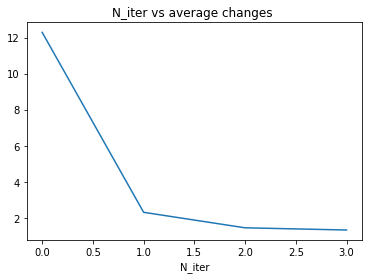

In [3]:
(corpus, tags) = data_dev
K = 5
start = time.time()
(tags_pred, n_changes) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K)   
runtime = time.time() - start
print("accuracy using gibbs sampling is {}".format(compute_tag_acc(tags_pred, tags)))
print("log prob of gibbs prediction is {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
print("runtime for gibbs sampling with K = {} is {}".format(K, runtime))
n_changes = np.array(n_changes)
plt.plot(n_changes.mean(axis = 0))
plt.title("N_iter vs average changes ")
plt.xlabel("N_iter")
plt.show()

### Comment:
With number of iterations growing, the number of changes decrease (but not to zero)

## (d)

In [4]:
# Ks = [2,5,10,50,100,500,1000]
Ks = [2,5,10]
for K in Ks:
    start = time.time()
    (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K)   
    runtime = time.time() - start
    print("Gibbs sampling with K = {}".format(K))
    print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
    print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
    print("runtime  : {}".format(runtime))

Gibbs sampling with K = 2
accuracy : 0.7787673956262425
log prob : -181921.5732343314
runtime  : 1.2384967803955078
Gibbs sampling with K = 5
accuracy : 0.8604373757455268
log prob : -166939.49942138811
runtime  : 4.375675916671753
Gibbs sampling with K = 10
accuracy : 0.8629025844930418
log prob : -166619.2419134717
runtime  : 9.230531930923462


## (e)

In [5]:
# # Ks = [2,5,10,50,100,500,1000]
# betas = [0.5,2,5]
# Ks = [2,5]
# for beta in betas:
#     print("##--------------------------##")
#     print("         beta = {}".format(beta))
#     print("##--------------------------##")
#     for K in Ks:
#         start = time.time()
#         (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, K=K, beta = beta)   
#         runtime = time.time() - start
#         print("Gibbs sampling with K = {}".format(K))
#         print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
#         print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
#         print("runtime  : {}".format(runtime))

In [8]:
# Ks = [2,5,10,50,100,500,1000]
annealing = 0.1
betas = [0.5,2,5]
Ks = [2,5,10]
for beta in betas:
    print("##--------------------------##")
    print("         beta = {}".format(beta))
    print("##--------------------------##")
    for K in Ks:
        start = time.time()
        (tags_pred, _) = gibbs_predictor(corpus, em_prob, trans_prob, tag2ix, word2ix,ix2tag, 
                                         K=K, beta = beta, annealing = annealing)   
        runtime = time.time() - start
        print("Gibbs sampling with K = {}".format(K))
        print("accuracy : {}".format(compute_tag_acc(tags_pred, tags)))
        print("log prob : {}".format(compute_prob_log(corpus, tags_pred, trans_prob, em_prob, word2ix, tag2ix)))
        print("runtime  : {}".format(runtime))

##--------------------------##
         beta = 0.5
##--------------------------##
Gibbs sampling with K = 2
accuracy : 0.5235387673956262
log prob : -261819.44525655147
runtime  : 1.1075129508972168
Gibbs sampling with K = 5
accuracy : 0.8308548707753479
log prob : -172643.27911572703
runtime  : 4.199375152587891
Gibbs sampling with K = 10
accuracy : 0.8699801192842942
log prob : -165613.9250292143
runtime  : 8.999047994613647
##--------------------------##
         beta = 2
##--------------------------##


../code/gibbs.py:22: RuntimeWarning: invalid value encountered in true_divide
  probs = probs/probs.sum()
../code/gibbs.py:26: RuntimeWarning: invalid value encountered in less
  state[j] = np.random.choice(trans_prob.shape[0], size = 1, p = probs)[0]


Gibbs sampling with K = 2
accuracy : 0.7908151093439364
log prob : -182123.1340744149
runtime  : 1.1052179336547852
Gibbs sampling with K = 5
accuracy : 0.8770974155069583
log prob : -164515.99557735294
runtime  : 4.071858882904053
Gibbs sampling with K = 10
accuracy : 0.8826242544731611
log prob : -164118.74751117063
runtime  : 9.61254620552063
##--------------------------##
         beta = 5
##--------------------------##
Gibbs sampling with K = 2
accuracy : 0.8025049701789264
log prob : -180367.27800460733
runtime  : 1.0999488830566406
Gibbs sampling with K = 5
accuracy : 0.8802385685884692
log prob : -164263.3955340905
runtime  : 4.181117057800293
Gibbs sampling with K = 10
accuracy : 0.8839363817097415
log prob : -163981.95847781285
runtime  : 8.955304861068726
